## Working with the AirBnB Data

This is here to help you if you'd like to download and process the _full_ Airbnb data set. There are something like 96 columns that you could work with, so there's plenty there to sink your teeth into if you so desire. 

### Randomness & Reproducibility

However, the rapid visualisation of the _full_ Airbnb data set using Geopandas/PySAL is hard: there's simply so much of it that visualisation is slow unless you're in a dedicated environment with lots of RAM. So, for the _exploratory_ part of our work we'd normally want to work with a _sample_ -- but what happens if every time we take a sample we get a _different_ sample? That obviously makes things a bit harder, it would be handy if we could get the _same_ random sample every time _while_ we're doing our testing and development before expanding to the full data set.

That's where `random.seed` and comes in: by setting a seed we ensure that any process based on a random/random sampling process will be reproducible. In other words, we'll get the _same_ random sample each time. To understand why this happens you'd need to read up on pseudo-randomness and computers but that's not really relevant here. Note, however, that we set the random seed in two places: in Python in general (`random`) and in numpy (`np.random`) because the latter is what Pandas usually uses.

In [1]:
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd

import numpy as np
np.random.seed(12345789) # For reproducibility

import random 
random.seed(123456789) # For reproducibility

In [3]:
local_path  = os.path.join('airbnb.csv.gz')
remote_path = 'http://data.insideairbnb.com/united-kingdom/england/london/2017-03-04/data/listings.csv.gz'

if os.path.exists(local_path):
    df = pd.read_csv(local_path, compression='gzip', low_memory=False)
else:
    df = pd.read_csv(remote_path, compression='gzip', low_memory=False)
    df.to_csv(local_path, compression='gzip')

print("Full data set shape is: " + ' by '.join(str(i) for i in df.shape))

Full data set shape is: 53904 by 95


In [4]:
sample = df.sample(frac=0.1)
print("Sample data set shape is: " + ', '.join(str(i) for i in sample.shape))
sample.describe()

Sample data set shape is: 5390, 95


,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,5.390000e+03,5.390000e+03,5.390000e+03,0.0,5387.000000,5387.000000,0.0,5390.000000,5390.000000,5390.000000,...,3734.000000,3723.000000,3722.000000,3717.000000,3724.000000,3721.000000,3719.000000,0.0,5390.000000,3808.000000
mean,1.039067e+07,2.017030e+13,3.270257e+07,NaN,15.036570,15.036570,NaN,51.510806,-0.127066,3.066976,...,91.832351,9.402632,9.205803,9.605596,9.643394,9.346412,9.213498,NaN,14.188868,1.313640
std,5.216469e+06,0.000000e+00,3.087757e+07,NaN,80.472511,80.472511,NaN,0.046120,0.089523,1.929968,...,9.808658,1.011680,1.165706,0.858975,0.816896,0.888770,1.007300,NaN,77.742057,1.415073
min,2.502300e+04,2.017030e+13,3.226000e+03,NaN,0.000000,0.000000,NaN,51.319567,-0.501305,1.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.020000
25%,6.220297e+06,2.017030e+13,7.181936e+06,NaN,1.000000,1.000000,NaN,51.485304,-0.187778,2.000000,...,89.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.330000
50%,1.130802e+07,2.017030e+13,2.341256e+07,NaN,1.000000,1.000000,NaN,51.514939,-0.122785,2.000000,...,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.810000
75%,1.510198e+07,2.017030e+13,4.875111e+07,NaN,3.000000,3.000000,NaN,51.539719,-0.068281,4.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,1.840000
max,1.754946e+07,2.017030e+13,1.187538e+08,NaN,735.000000,735.000000,NaN,51.672438,0.258924,16.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,711.000000,10.530000


In [5]:
sample.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms',

You can _always_ do a 'quick and dirty' scatter plot to see if the data seems vaguely sensible -- it's obviously limited as a geo-visualisation but it can give you an _idea_ of whether or not you've done the right thing with your data. For example...

/anaconda3/envs/gsa2018/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/gsa2018/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


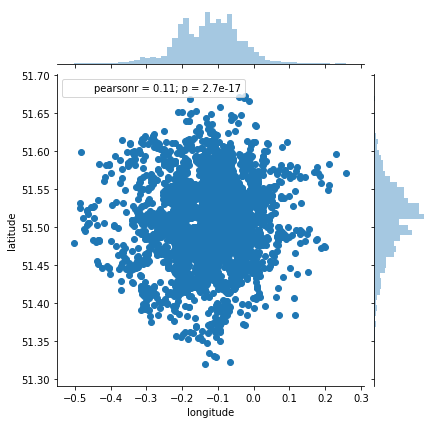

In [6]:
#help(sns.jointplot)
sns.jointplot(x="longitude", y="latitude", data=sample)

You'll notice that this 'map' isn't particularly good, but it does tell us that the longitude and latitude values are reasonable: you'd expect to find more AirBnB listings towards the middle of the city and there's a _hint_ of the Thames and the Lee Valley in there (though this is a bit of a stretch). To actually _map_ the data we'll need to be a little more rigorous... 

Let's step through what's going on below:
1. We need to import the `Point` class so that we move from separate x and y columns to a single 'point' that Geopandas can work with.
2. We then 'zip' up the x and y (i.e. lat and long) into pairs -- think of this as a simple way to pair _each_ x and y based on their row position and this allows us to move from separate columns to actual points.
3. The next step is to tell Geopandas what projection our data is in -- raw lat and long are _usually_ recorded in WGS84 which has the EPSG identifier 4326 (_i.e._ epsg:4326).
4. You'll notice that to create a new `GeoDataFrame` we do so _slightly_ differently from how we created a new `DataFrame` last term: we pass in the existing `pandas` data frame (`sample`), the CRS (projection), and finally the `geometry` that we created from the `zip` process.
5. The last step is to reproject the geometry into OSGB (Ordnance Survey GB) which has the EPSG identifier 27700. 

You can see the results of this step in the final step where we print out the first 3 rows of the reprojected data: notice that the point coordinates are no longer in lat/long!

Some of this _might_ seem a little tedious, but it's incredibly useful to be able to automate this process: we can reproject a whole series of shapefiles (e.g. every single file in a directory!), we can convert CSV files into shapes that load automatically into QGIS instead of having to do this process manually...

In [ ]:
from shapely.geometry import Point
# Convert x,y to Points using zip(...)
geometry = [Point(xy) for xy in zip(sample.longitude, sample.latitude)]

print("From the data frame...")
print(sample.head(3)[['longitude','latitude']])
print("-" * 50)

print(" ")
print("From the geometry zip...")
print([", ".join([str(p.x), str(p.y)]) for p in geometry[0:3]])
print("-" * 50)

print(" ")
# Initialise to WGS84
crs = {'init' :'epsg:4326'}
sdf = gpd.GeoDataFrame(sample, crs=crs, geometry=geometry)

# Reproject into OSGB
sdf = sdf.to_crs({'init' :'epsg:27700'})
# Check it worked (coordinates no longer in lat/long)
print(sdf.head(3)[['neighbourhood','geometry']])

# And save it as a new shapefile
sdf.to_file(os.path.join('shapes','AirBnB-Sample.shp'))

Plotting the AirBnB sample will take some time... so be patient! You'll notice that the results are now also reported in OSGB units, not lat/long, so this is one way in which GeoPandas is more 'knowledgeable' about geodata than pandas.

In [ ]:
# Ensures that we work with the sample we just saved in case
# we want to adjust our processing and don't want to have 
# to re-run the entire analysis just because we've overwritten 
# a column (see next step)
sdf = gpd.read_file(os.path.join('shapes','AirBnB-Sample.shp'))

In [ ]:
# The format in the full data set is $1,250.00 so we need to deal with that
sdf['price'] = sdf.price.str.replace('$','').str.replace(',','').astype('float').fillna(0.0)

In [ ]:
# Check we've got something plot-able
sdf.price.describe()

In [ ]:
# Check distribution (could probably use a transform)
sns.distplot(sdf.price)

In [ ]:
# And make a map
f, ax = plt.subplots(1, figsize=(15, 11))
sdf.plot(ax=ax, column='price', cmap='OrRd', scheme='quantiles', k=5, edgecolor=None, legend=True, s=1.5)
plt.axis('equal')